In [1]:
import tensorflow as tf

2023-09-08 20:47:10.179531: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
import requests

# Define the API URL
api_url = "http://192.168.0.201:4000/api/v0/ubbets/totalcount/"

# Make the API request
response = requests.get(api_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response into a dictionary
    data = response.json()
    print("API response:")
    print(data)
else:
    print(f"API request failed with status code {response.status_code}")

API response:
{'ubbets_count': 94712}


In [5]:
import requests

# Define the API URL
api_url = "http://192.168.0.201:4000/api/v0/ubbets/details/"

# Make the API request
response = requests.get(api_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response into a dictionary
    data = response.json()
else:
    print(f"API request failed with status code {response.status_code}")

In [24]:
import sys
# Calculate the size of the 'data' dictionary in bytes
print(sys.getsizeof(data), "bytes")

232 bytes


In [15]:
import pandas as pd

# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame.from_dict(data)

df.iloc[0]

ubbets    [m8Ept5t7cpuUuRcyhudt, YwtpmFHqEZuUiIKtXyFN, -...
Name: 0, dtype: object

In [22]:
# Convert the list of entries to a Pandas DataFrame
df = pd.DataFrame(data['ubbets'])

df.head()

,0,1,2,3,4,5,6,7
0,m8Ept5t7cpuUuRcyhudt,YwtpmFHqEZuUiIKtXyFN,-74.003625,1693135602227,"[{'amount': -74.00362467398847, 'isSale': True...",YES,5JTjLRLqurS67gwM9RDIIggfzBz1,None
1,ejODbxrzgZ3Iqtj6zFAH,yOLdeZ0n3AttIJ0wCQE1,35.000000,1692184973366,"[{'amount': 19.169853923684464, 'matchedBetId'...",NO,AA10TMBdN9ZxXOP7pRECfuzhqMW2,None
2,Tg0gF61b8p2X8IdVufRG,lbmIuDpuJhBLjFoCphJt,100.000000,1692283495374,"[{'amount': 100, 'matchedBetId': None, 'shares...",NO,BhNkw088bMNwIFF2Aq5Gg9NTPzz1,None
3,y8E5WqkIHkpWXyS561v0,U03M56KRCKzXfmB3CuC0,10.000000,1693312921576,"[{'amount': 10, 'matchedBetId': None, 'shares'...",NO,kB8B9wkkCeRj0a3rvri2ZzZxhpN2,None
4,6LzyyDtI7hgb2ALilJLb,kIl20PfgaUtyCKCDsSeI,3.540660,1693472867387,"[{'amount': 3.5406598716457145, 'matchedBetId'...",YES,BhNkw088bMNwIFF2Aq5Gg9NTPzz1,None


In [25]:
import requests

# Define the API URL
api_url = "http://192.168.0.201:4000/api/v0/ubbets/headers/"

# Make the API request
response = requests.get(api_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response into a dictionary
    data = response.json()
    print("API response:")
    print(data)
else:
    print(f"API request failed with status code {response.status_code}")

API response:
{'ubbets_headers': ['market_id', 'bet_id', 'amount', 'created_time', 'fills', 'outcome', 'user_id', 'original_inserted_at']}


In [32]:
headers = data['ubbets_headers']
df.columns = headers
df.head()

,market_id,bet_id,amount,created_time,fills,outcome,user_id,original_inserted_at
0,m8Ept5t7cpuUuRcyhudt,YwtpmFHqEZuUiIKtXyFN,-74.003625,1693135602227,"[{'amount': -74.00362467398847, 'isSale': True...",YES,5JTjLRLqurS67gwM9RDIIggfzBz1,None
1,ejODbxrzgZ3Iqtj6zFAH,yOLdeZ0n3AttIJ0wCQE1,35.000000,1692184973366,"[{'amount': 19.169853923684464, 'matchedBetId'...",NO,AA10TMBdN9ZxXOP7pRECfuzhqMW2,None
2,Tg0gF61b8p2X8IdVufRG,lbmIuDpuJhBLjFoCphJt,100.000000,1692283495374,"[{'amount': 100, 'matchedBetId': None, 'shares...",NO,BhNkw088bMNwIFF2Aq5Gg9NTPzz1,None
3,y8E5WqkIHkpWXyS561v0,U03M56KRCKzXfmB3CuC0,10.000000,1693312921576,"[{'amount': 10, 'matchedBetId': None, 'shares'...",NO,kB8B9wkkCeRj0a3rvri2ZzZxhpN2,None
4,6LzyyDtI7hgb2ALilJLb,kIl20PfgaUtyCKCDsSeI,3.540660,1693472867387,"[{'amount': 3.5406598716457145, 'matchedBetId'...",YES,BhNkw088bMNwIFF2Aq5Gg9NTPzz1,None


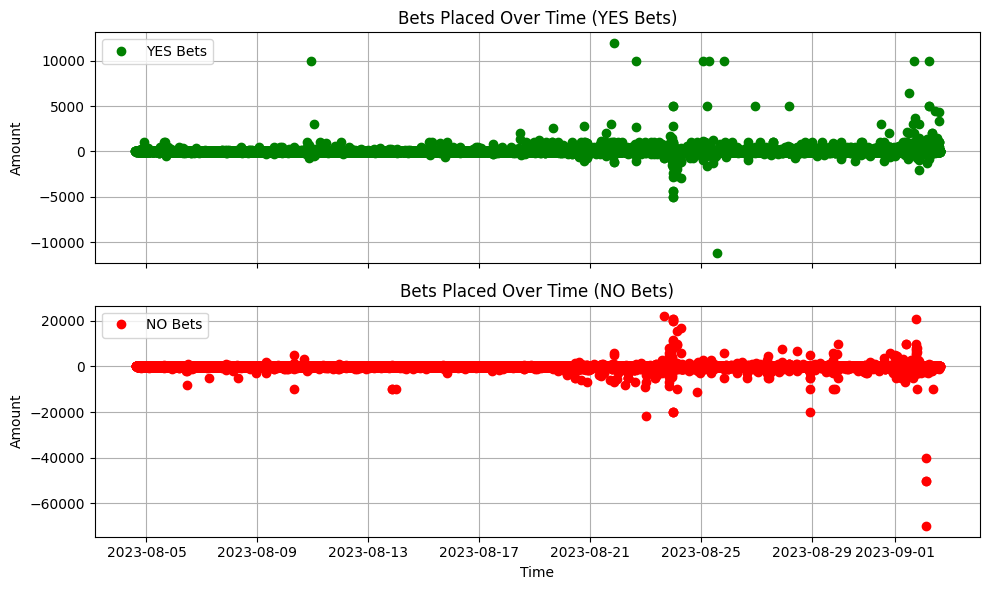

In [41]:
import matplotlib.pyplot as plt

# Convert created_time to a human-readable date
df['created_time'] = pd.to_datetime(df['created_time'], unit='ms')

# Separate the data into YES and NO bets
yes_bets = df[df['outcome'] == 'YES']
no_bets = df[df['outcome'] == 'NO']

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot YES bets
ax1.plot(yes_bets['created_time'], yes_bets['amount'], 'go', label='YES Bets')
ax1.set_ylabel('Amount')
ax1.set_title('Bets Placed Over Time (YES Bets)')
ax1.grid(True)
ax1.legend()

# Plot NO bets
ax2.plot(no_bets['created_time'], -no_bets['amount'], 'ro', label='NO Bets')
ax2.set_xlabel('Time')
ax2.set_ylabel('Amount')
ax2.set_title('Bets Placed Over Time (NO Bets)')
ax2.grid(True)
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [37]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/47/b9/6c0daa9b953a80b4e6933bf6a11a2d0633f257e84ee5995c5fd35de564c9/matplotlib-3.7.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached matplotlib-3.7.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/38/6f/5382bdff9dda60cb17cef6dfa2bad3e6edacffd5c2243e282e851c63f721/contourpy-1.1.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached contourpy-1.1.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.7 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/49/50/2e31753c088d364756daa5bed0dab6a5928ebfd6e6d26f975c8b6d6f754a/fonttools-4.42.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_6